## Finance Data Project 

**This project is focused on exploratory data analysis (EDA) of stock prices, on bank securities and how they have evolved throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) until early 2016.**

---
Este proyecto esta centrado en el análisis exploratorio de datos (EDA) de los precios de las acciones, en los valores bancarios y cómo han evolucionado a lo largo de la [crisis financiera](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) hasta principios de 2016.

### Importing libraries (Importando las librerias)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline


###  Get the Data (obtener los datos)

Get stock information for the following banks (Obtener información sobre las acciones de los siguientes bancos):

  * Bank of America
  * CitiGroup
  * Goldman Sachs
  * JPMorgan Chase
  * Morgan Stanley
  * Wells Fargo

**On this page is the documentation for getting the financial data, tips and instructions. In this case I will use Yahoo Finance Data finance as a source.** 

 En esta página está la documentación para obtener los datos financieros consejos e instrucciones. En este caso utlizaré Yahoo Finance Data finance como [fuente](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) 

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)


In [6]:
# Revisando que se hayan creado los datasets de cada banco
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.114273
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.139042
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.238129
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,36.275299
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,36.659279
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,28.033369
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,27.765810
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,28.093788


**Create a list of the ticker symbols (as strings) in alphabetical order.**

Crear una lista de los tickers (como strings) en orden alfabético.

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Concatenate the dataframes of the banks into a single dataframe.**

 Concatenar los dataframes de los bancos en un único dataframe.

In [9]:
# axis=1 concatena en columnas
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys= tickers)
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.106018   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.743816   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.787285   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.736572   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.758289   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.114273  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.139042  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.238129  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.275299  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  36.659279  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.444874  
2006-01-04  31.530001  10870000.0  20.207735  
2006-01-05  31.495001  10158000.0  20.185308  
2006-01-06  31.680000   8403800.0  20.303871  
2006-01-09  31.674999   5619600.0  20.300665  

[5 rows x 36 columns]

**Set 'Bank Stock' and 'Stock info' as levels to sort the columns :**

Establecer como niveles 'Bank Stock' y 'Stock info' para ordenar las columnas :

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.106018  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.743816  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.787285  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.736572  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.758289  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.114273  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.139042  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.238129  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.275299  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  36.659279  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.444874  
2006-01-04   31.799999  31.530001  10870000.0  20.207735  
2006-01-05   31.500000  31.495001  10158000.0  20.185308  
2006-01-06   31.580000  31.680000   8403800.0  20.303871  
2006-01-09   31.674999  31.674999   5619600.0  20.300665  

[5 rows x 36 columns]

---
##  EDA (Exploratory Data Analysis) 


**What is the max Close price for each bank's stock throughout the time period?**

¿Cuál es el precio máximo de cierre de las acciones de cada banco a lo largo del período?

In [13]:
bank_stocks['BAC']['Close'].max() 

In [ ]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [ ]:
# usando xs method
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

Cree un nuevo DataFrame vacío llamado retornos. Este dataframe contendrá los rendimientos de las acciones de cada banco. los rendimientos se definen normalmente por:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [ ]:
returns = pd.DataFrame()

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

Podemos utilizar el método pandas pct_change() en la columna Close para crear una columna que represente este valor de retorno. Crear un bucle for que vaya y por cada Bank Stock Ticker cree esta columna de retornos y la establezca como una columna en el DataFrame de retornos.

In [ ]:
for tick in tickers:
    returns[tick + ' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [ ]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

Cree un diagrama de pares utilizando seaborn del marco de datos de los rendimientos. ¿Qué acciones te llaman la atención? ¿Puedes averiguar por qué?

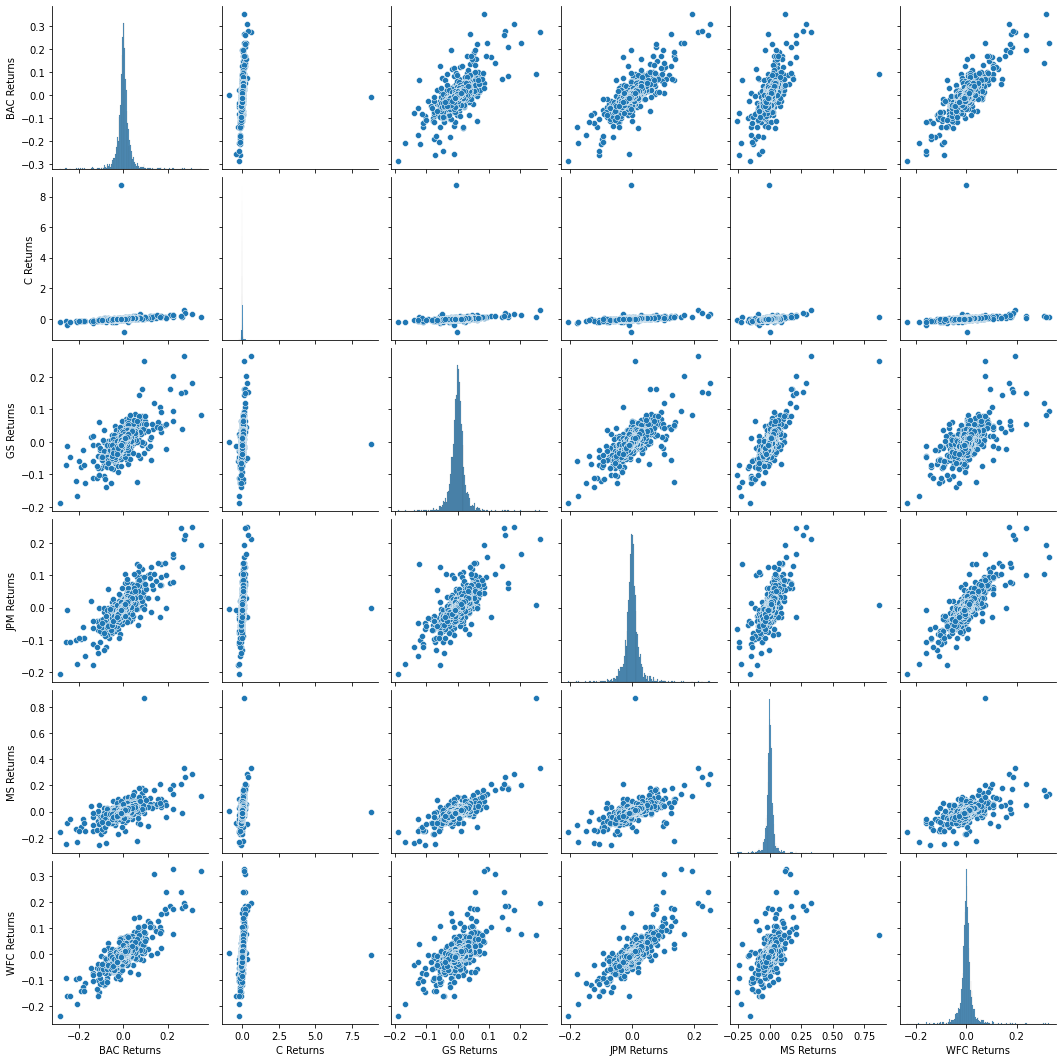

In [ ]:
# dará error basicamente porque la 1er fila tienen valores nulos
sns.pairplot(returns)

In [ ]:
# asi ya no se ve la 1era fila con datos nulos
returns[1: ]

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000947
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


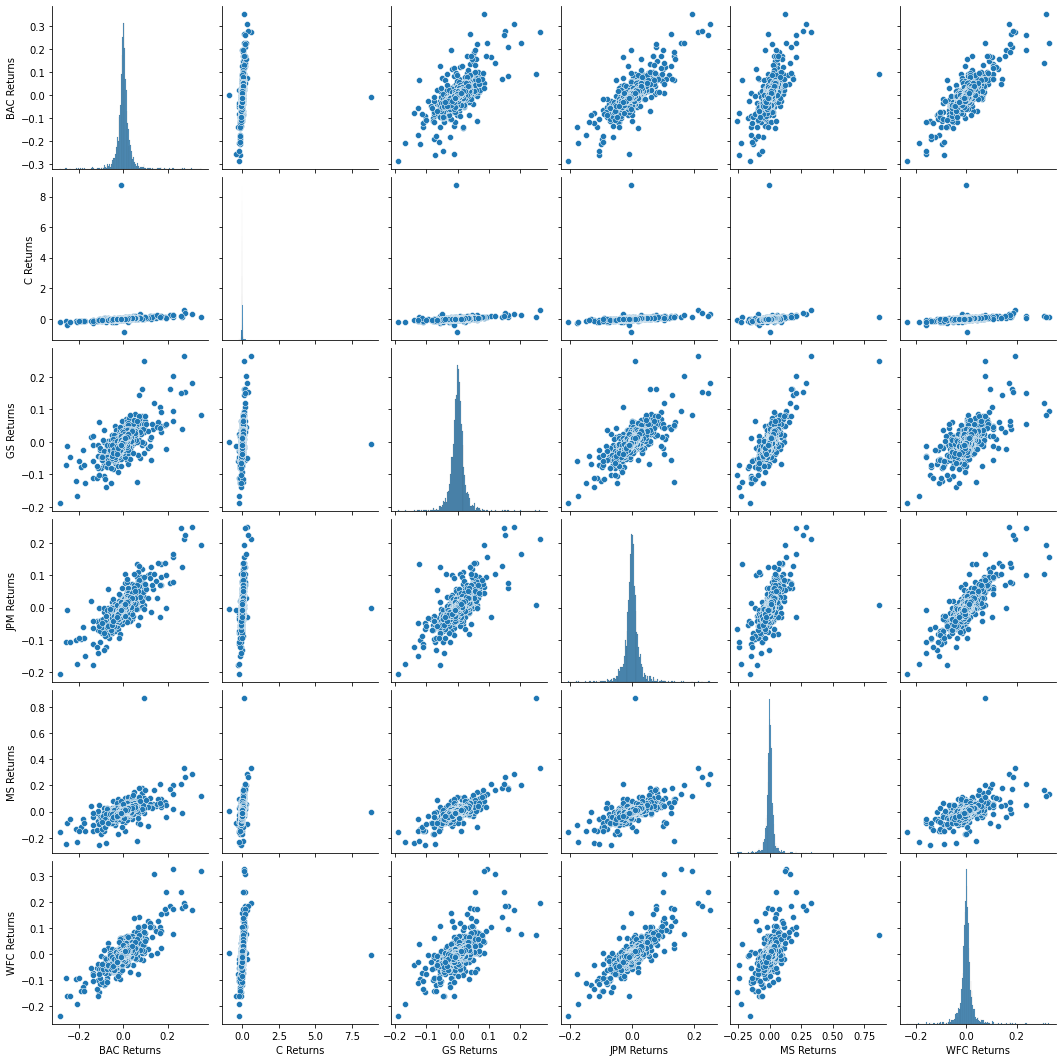

In [ ]:
sns.pairplot(returns[1: ])
plt.style.use('dark_background')
plt.grid(lw=0.5)

* See solution for details about Citigroup behavior....

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

Utilizando este DataFrame de rendimientos, averigua en qué fechas las acciones de cada banco tuvieron los mejores y peores rendimientos de un día. Debería notar que 4 de los bancos comparten el mismo día para la peor caída, ¿pasó algo significativo ese día?

In [ ]:
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [ ]:
returns.min()

BAC Returns   -0.289694
C Returns     -0.899107
GS Returns    -0.189596
JPM Returns   -0.207274
MS Returns    -0.258929
WFC Returns   -0.238223
dtype: float64

In [ ]:
returns['BAC Returns'].min()

-0.2896935933147633

In [ ]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2011-05-06
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [ ]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2011-05-09
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

**You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?**

Deberías haber notado que la mayor caída y la mayor ganancia de Citigroup estuvieron muy cerca una de la otra, ¿pasó algo significativo en ese lapso de tiempo?

* See Solution for details

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

Observe la desviación estándar de los rendimientos, ¿qué acción clasificaría como la más arriesgada durante todo el período de tiempo? ¿Cuál clasificaría como la más arriesgada para el año 2015?

In [ ]:
# desv estandar
returns.std()

BAC Returns    0.036650
C Returns      0.179969
GS Returns     0.025346
JPM Returns    0.027656
MS Returns     0.037820
WFC Returns    0.030233
dtype: float64

In [ ]:
returns.head(3)

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951


In [ ]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

Crea un distplot usando seaborn de los rendimientos de 2015 para Morgan Stanley

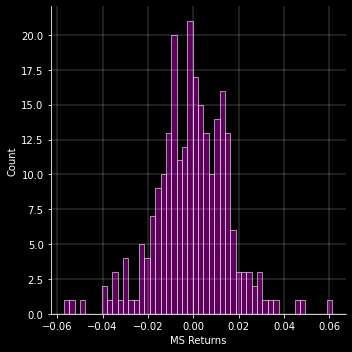

In [ ]:
sns.displot(returns.loc['2015-01-01': '2015-12-31']['MS Returns'], color= 'purple', bins= 50)
plt.grid(lw = 0.25)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

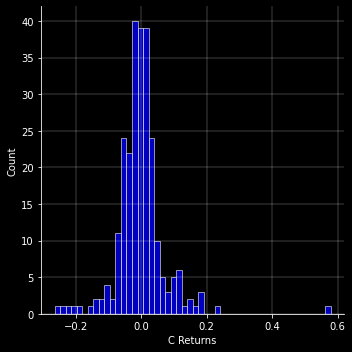

In [ ]:
sns.displot(returns.loc['2008-01-01': '2008-12-31']['C Returns'], color= 'blue', bins= 50)
plt.grid(lw = 0.25)

____
# More Visualization

**A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.**

Gran parte de este proyecto se centrará en las visualizaciones. Siéntase libre de utilizar cualquiera de sus bibliotecas de visualización preferidas para tratar de recrear los gráficos descritos a continuación, seaborn, matplotlib, plotly y cufflinks, o simplemente pandas.

### Imports

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Optional Plotly Method Imports
import plotly.express as px 
#import cufflinks as cf
#cf.go_offline()

**Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

Cree un gráfico de líneas que muestre el precio de cierre de cada banco para todo el índice de tiempo. (Sugerencia: Intente utilizar un bucle for, o utilice [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) para obtener una sección transversal de los datos).

In [ ]:
bank_stocks.head(2)

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000

[2 rows x 30 columns]

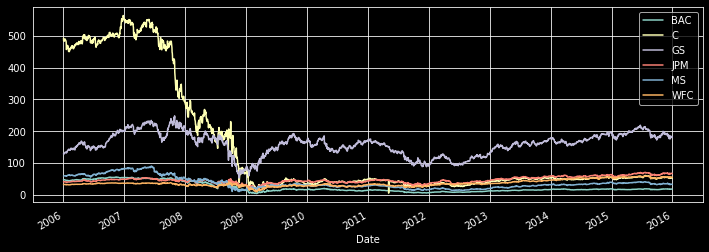

In [106]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label= tick, figsize= (12, 4))
plt.legend()    
plt.style.use('dark_background')

In [ ]:
bank_stocks.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [ ]:
bank_stocks['BAC']['Close']

Date
2006-01-03    47.08
2006-01-04    46.58
2006-01-05    46.64
2006-01-06    46.57
2006-01-09    46.60
              ...  
2015-12-24    17.27
2015-12-28    17.13
2015-12-29    17.28
2015-12-30    17.05
2015-12-31    16.83
Name: Close, Length: 2517, dtype: float64

In [93]:
bank_stocks['BAC'].index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
           dtype='int64', name='Date', length=2517)

In [ ]:
for tick in tickers:
    bank_stocks[tick]['Close'] #.plot(label= tick, figsize= (12, 4))

px.line( data_frame=bank_stocks, x= bank_stocks.index.year, y= bank_stocks[tick]['Close']) 

## Moving Averages (Medias móviles)

**Let's analyze the moving averages for these stocks in the year 2008**

Analicemos las medias móviles de estos valores en el año 2008

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

Trace la media móvil de 30 días frente al precio de cierre de las acciones de Bank Of America para el año 2008

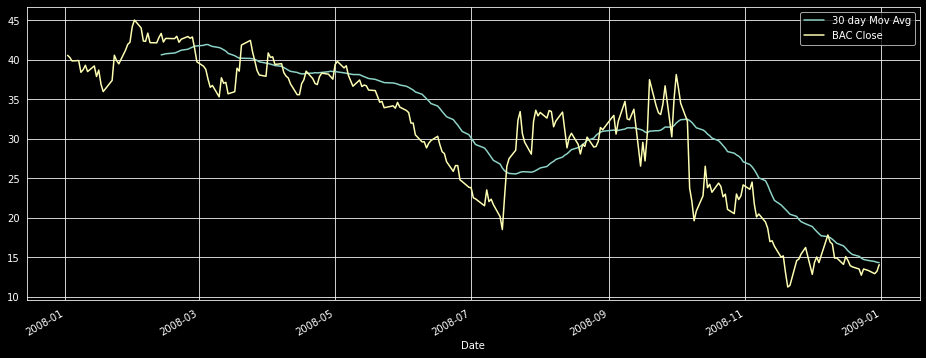

In [121]:
plt.figure(figsize=(16,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label= '30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label= 'BAC Close')
plt.legend()

**Create a heatmap of the correlation between the stocks Close Price.**

In [123]:
bank_stocks.head(3)

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000

[3 rows x 30 columns]

In [122]:
#sns.heatmap()
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info')

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.90,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.80,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.20,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.20,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.90,130.39,40.67,59.19,31.68
...,...,...,...,...,...,...
2015-12-24,17.27,52.71,182.47,66.60,32.48,54.82
2015-12-28,17.13,52.38,181.62,66.38,32.17,54.68
2015-12-29,17.28,52.98,183.53,67.07,32.55,55.29


In [124]:
# mostrando correlaciones
bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
C,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


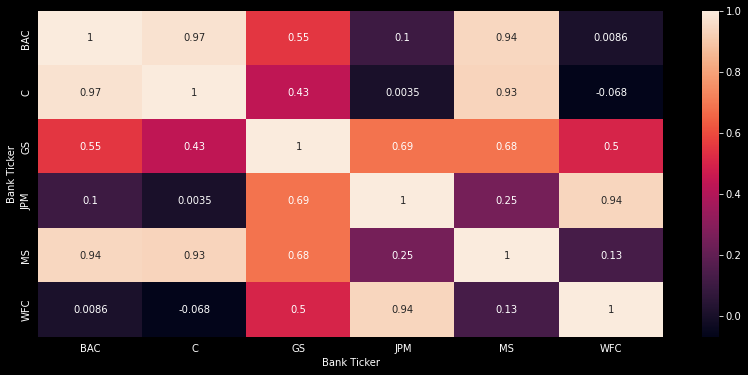

In [131]:
plt.figure(figsize=(14,6))
sns.heatmap(bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr(), annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 1008x432 with 0 Axes>

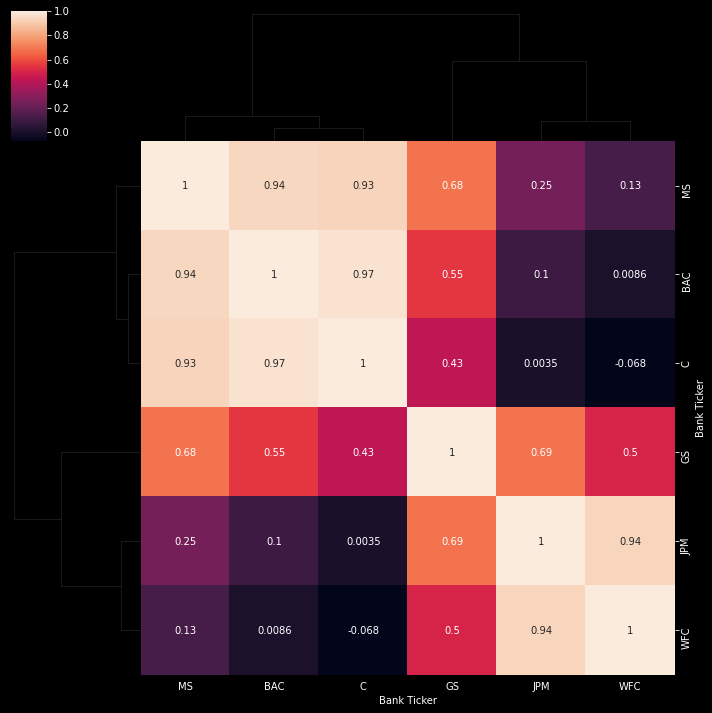

In [132]:
plt.figure(figsize=(14,6))
sns.clustermap(bank_stocks.xs(key= 'Close', axis= 1, level= 'Stock Info').corr(), annot=True)

In [ ]:
bank_stocks.xs(key='Close', axis=1, level= 'Stock Info').iplot()

# Part 2 (Optional)

**In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.**

En esta segunda parte del proyecto nos basaremos en la biblioteca cufflinks para crear algunos gráficos de Análisis Técnico. Esta parte del proyecto es experimental debido a su fuerte dependencia del proyecto cuffinks, así que siéntase libre de omitirla si alguna funcionalidad se rompe en el futuro.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.